In [161]:
import sys
sys.path.append("../")
import torch
from CFIL_for_NIP.memory import ApproachMemory

In [162]:
memory_size=5e4
device = "cuda" if torch.cuda.is_available() else "cpu"  
approach_memory = ApproachMemory(memory_size, device)

In [163]:
joblib_path = "../CFIL_for_NIP/train_data/20250127_almi/persam_f_mask_image_only.joblib"
approach_memory.load_joblib(joblib_path)

In [164]:
batch_size = 32
sample = approach_memory.sample(batch_size)
imgs = sample['images_seq']
positions_eb = sample['positions_seq']

In [169]:
print(positions_eb[0])

tensor([ 1.6306e+01, -1.0430e+00, -4.4894e-03,  2.7936e-03, -9.7300e-03,
        -7.1562e-01], device='cuda:0')


In [165]:
from torchvision import transforms as transforms
import numpy as np
rng = np.random.default_rng()
RandomAutocontrast = transforms.RandomAutocontrast(p=1.0)
RandomAdjustSharpness = transforms.RandomAdjustSharpness(sharpness_factor=5, p=0.5)
RandomInvert = transforms.RandomInvert(p=rng.random())

In [166]:
# imgs = RandomAdjustSharpness(imgs)
# imgs = RandomAutocontrast(imgs)
imgs = RandomInvert(imgs)

In [167]:
img = imgs[0].cpu().numpy().transpose(1,2,0)
img.shape

(256, 256, 3)

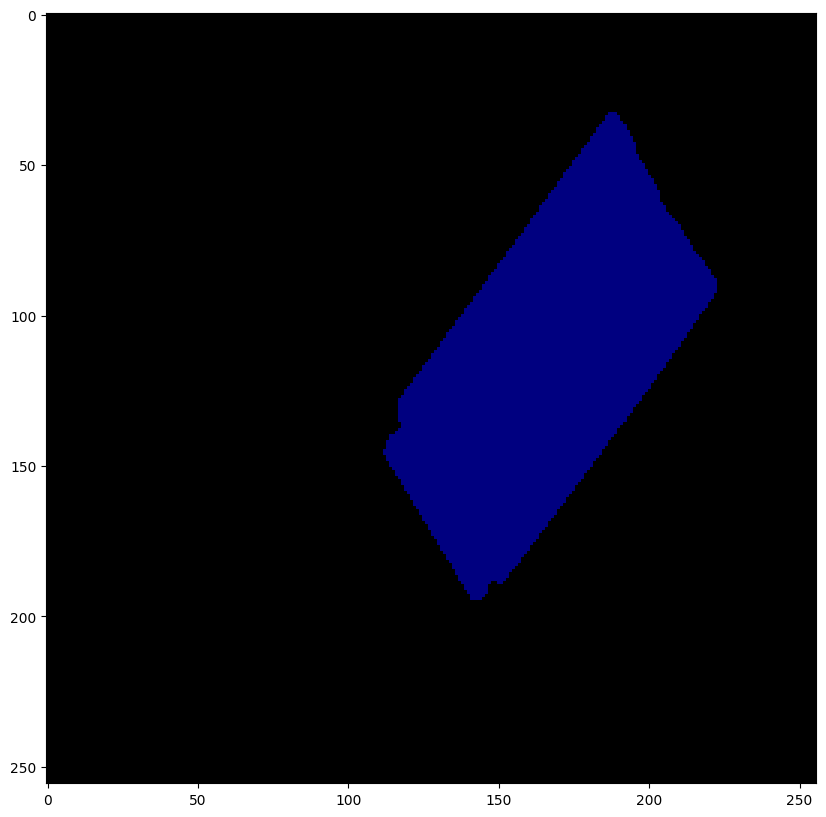

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()  
